# Bulldozer pricing prediction


#### According to ML map from SKLEARN, we will be using Regression as ML model and not classifiers because we are not estimating categories rather numeric data




### Import the necessary libraries and set up the seaborn library for better visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_absolute_error as MAE , mean_squared_log_error as rmsle, r2_score as r2
sns.set(color_codes=True)
sns.set_palette("deep")

### PARSING DATE-TIME OBJECTS

In [2]:

read=pd.read_csv(r'C:\Users\Hp\Desktop\DATA SCIENCE DOCS\.csv Files\bluebook-for-bulldozers\TrainAndValid.csv'
                 ,low_memory=False,parse_dates=['saledate'])
df=pd.DataFrame(read)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


### Year wise plot

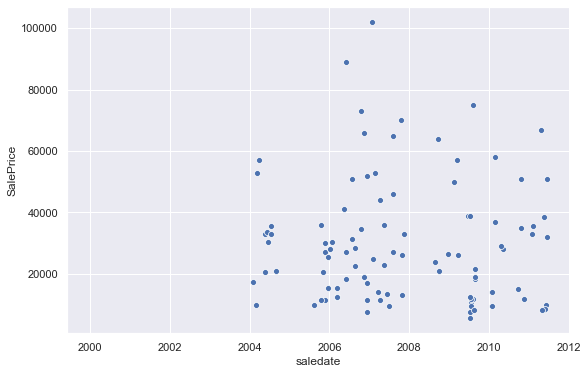

In [3]:

plt.figure(figsize=(9,6))
sns.scatterplot(df['saledate'].head(100),df['SalePrice'].head(100),data=df);
plt.show()

In [4]:
df.sort_values(['saledate'],ascending=True,inplace=True) #not df[column name], just column name
df1=df.copy()

### FEATURING ENGINEERING FOR DATE AND TIME. CREATING NEW COLUMNS

In [5]:

df1['saleYear']=df1['saledate'].dt.year
df1['saleMonth']=df1['saledate'].dt.month
df1['saleDay']=df1['saledate'].dt.day
df1['saleDayofWeek']=df1['saledate'].dt.dayofweek
df1['saleDayOfYear']=df1['saledate'].dt.dayofyear
df1.head(10)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


### REMOVE the original sale date column

In [6]:

df1.drop(['saledate'],axis=1,inplace=True)
df1.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### All columns which are string type

In [7]:

print("All column names which are of type string: ")
for label,content in df1.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

All column names which are of type string: 
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Check null values percentage

In [8]:

100*df1.isnull().sum()/len(df1)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Check for columns which are NUMERICAL and have NULL values

In [9]:

for i in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[i].values):
        if pd.isnull(df1[i].values).any():
            print(i)

auctioneerID
MachineHoursCurrentMeter


### Fill the missing values for the above columns

In [10]:
for i in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[i].values):
        if pd.isnull(df1[i].values).any():
            df1[i].fillna((df1[i]).median(),inplace=True) #we choose median over mean because it is more robust



### Check for columns that are NOT NUMERICAL and have NULL values

In [11]:
for i in df1.columns:
    if not pd.api.types.is_numeric_dtype(df1[i].values):
        if pd.isnull(df1[i].values).any():
            print(i)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Fill the missing values for above columns

In [12]:

for i in df1.columns:
    if not pd.api.types.is_numeric_dtype(df1[i].values):
        df1[i]=pd.Categorical(df1[i].values).codes+1
        

### Check percentage of missing values in each column

In [13]:

100*df1.isnull().sum()/len(df1)

SalesID                     0.0
SalePrice                   0.0
MachineID                   0.0
ModelID                     0.0
datasource                  0.0
auctioneerID                0.0
YearMade                    0.0
MachineHoursCurrentMeter    0.0
UsageBand                   0.0
fiModelDesc                 0.0
fiBaseModel                 0.0
fiSecondaryDesc             0.0
fiModelSeries               0.0
fiModelDescriptor           0.0
ProductSize                 0.0
fiProductClassDesc          0.0
state                       0.0
ProductGroup                0.0
ProductGroupDesc            0.0
Drive_System                0.0
Enclosure                   0.0
Forks                       0.0
Pad_Type                    0.0
Ride_Control                0.0
Stick                       0.0
Transmission                0.0
Turbocharged                0.0
Blade_Extension             0.0
Blade_Width                 0.0
Enclosure_Type              0.0
Engine_Horsepower           0.0
Hydrauli

### Removing duplicate features variables. EXCLUDE THE TARGET VARIABLE

In [14]:
%%time

df_dup=df1.copy()
df_dup.drop('SalePrice',axis=1,inplace=True)

#Print how many duplicate features are there
print((df_dup.iloc[0:20000,:]).T.duplicated().sum())

#Show the duplicated features
unique_features = df_dup.T.drop_duplicates(keep='first').T
unique_features
duplicated_features = [dup_col for dup_col in df_dup.columns if dup_col not in unique_features.columns]
duplicated_features

1
Wall time: 11.5 s


"unique_features = df_dup.T.drop_duplicates(keep='first').T\nunique_features\nduplicated_features = [dup_col for dup_col in df_dup.columns if dup_col not in unique_features.columns]\nduplicated_features"

#### Drop above duplicate columns:

In [15]:
df1.drop('ProductGroupDesc',axis=1,inplace=True)

### Correlation of features with one another

In [16]:
df1.corr()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
SalesID,1.000000,0.023119,0.310149,0.147883,0.768909,-0.007111,0.005316,0.027935,0.142339,0.078597,...,-0.029527,-0.030595,-0.037630,-0.006764,-0.006464,0.465565,0.008000,0.029720,-0.109902,0.010487
SalePrice,0.023119,1.000000,-0.216841,-0.038063,0.021708,-0.046357,0.154389,0.017921,0.073002,0.006936,...,0.112081,0.134685,0.081721,0.117448,0.119782,0.043393,-0.033374,-0.000527,-0.056015,-0.033482
MachineID,0.310149,-0.216841,1.000000,0.165140,0.375914,-0.003944,-0.052118,0.006746,0.050644,0.077816,...,-0.066139,-0.083579,-0.052466,0.012808,0.005901,0.083661,0.005383,0.003439,-0.026031,0.005633
ModelID,0.147883,-0.038063,0.165140,1.000000,0.097704,-0.019525,-0.045511,0.007880,0.138433,0.200001,...,-0.114233,-0.124945,-0.108416,-0.043292,-0.045272,0.144706,-0.002906,0.007134,-0.002707,-0.002308
datasource,0.768909,0.021708,0.375914,0.097704,1.000000,-0.020133,0.070933,0.039851,0.243119,0.024115,...,-0.011552,-0.010418,-0.021571,0.000681,-0.000023,0.354394,0.002488,0.005641,-0.124246,0.002675
auctioneerID,-0.007111,-0.046357,-0.003944,-0.019525,-0.020133,1.000000,-0.017114,0.008788,-0.005523,-0.012759,...,0.015338,0.012090,0.019088,-0.002969,-0.002580,-0.068789,0.012736,-0.015286,0.094230,0.011183
YearMade,0.005316,0.154389,-0.052118,-0.045511,0.070933,-0.017114,1.000000,-0.011555,0.048129,-0.130495,...,0.012270,0.016224,0.007994,-0.002494,-0.001614,-0.042783,0.017667,-0.011406,-0.045169,0.016959
MachineHoursCurrentMeter,0.027935,0.017921,0.006746,0.007880,0.039851,0.008788,-0.011555,1.000000,0.120932,0.004097,...,-0.001183,-0.001416,-0.003727,0.011910,0.011415,0.065204,-0.014689,0.000408,0.013436,-0.015004
UsageBand,0.142339,0.073002,0.050644,0.138433,0.243119,-0.005523,0.048129,0.120932,1.000000,0.039098,...,-0.017798,-0.022533,-0.027680,-0.021918,-0.021450,0.336189,0.007125,0.012519,-0.015624,0.007910
fiModelDesc,0.078597,0.006936,0.077816,0.200001,0.024115,-0.012759,-0.130495,0.004097,0.039098,1.000000,...,0.127169,0.134050,0.122504,0.119638,0.120205,0.043823,-0.014073,0.002124,-0.005322,-0.013854




### Correlation of features with one another

#### Note: Check the upper triangle of correlation matrix and drop the features correlated with one another"""

In [17]:
#This is not required now because most of the features have correlation less than 0.3
"""corr_matrix=df1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
drop_features=[column for column in upper.columns if any(upper[column]>0.5)]
df_corr=df1.copy()
df_corr.drop(drop_features,axis=1,inplace=True)
df_corr['saleYear']=df1['saleYear']"""
#use df_corr during splitting of data instead of df1

"corr_matrix=df1.corr().abs()\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\nupper\ndrop_features=[column for column in upper.columns if any(upper[column]>0.5)]\ndf_corr=df1.copy()\ndf_corr.drop(drop_features,axis=1,inplace=True)\ndf_corr['saleYear']=df1['saleYear']"





### Correlation of features with target and selecting features with abs(corr) less than 1 and more than 0.13(trial and error)

In [18]:


corr=df1.corr()['SalePrice'].sort_values(ascending=False)
abs_corr=abs(corr)
abs_corr
relevant_features=abs_corr[abs_corr>0.13]
relevant_features=relevant_features[relevant_features<1]
relevant_features
relevant_features.index

Index(['fiModelDescriptor', 'ProductSize', 'ProductGroup', 'Ripper',
       'Pushblock', 'Engine_Horsepower', 'fiSecondaryDesc', 'Blade_Extension',
       'Tip_Control', 'Scarifier', 'Tire_Size', 'Blade_Width',
       'Enclosure_Type', 'fiModelSeries', 'YearMade', 'Track_Type',
       'fiProductClassDesc', 'Blade_Type', 'Pattern_Changer', 'Grouser_Type',
       'Enclosure', 'Pad_Type', 'Turbocharged', 'MachineID', 'Stick', 'Forks',
       'Grouser_Tracks', 'Coupler_System', 'Hydraulics_Flow'],
      dtype='object')





### NOW IS THE TIME TO SPLIT OUR DATASET INTO TRAINING,TESTING and VALIDATION SETS. Apparently we can't just split it using train-test-split or k-fold because the client has given us the train,validation and test dates and we need to split accordingly 
### Train dates are: until end of 2011
### Validation: Jan 1-April 30 2012
### Test: May 1- November 30 2012"""

### SPLITTING OF DATA AND NORMALIZATION

In [19]:
df_val=df1[df1['saleYear']==2012]   #Validation Data
df_train=df1[df1['saleYear']!=2012] #Training Data

X_train=df_train.copy()
X_train.drop('SalePrice',axis=1,inplace=True)
X_train=X_train[relevant_features.index] #DATAFRAME

X_val=df_val.copy()
X_val.drop('SalePrice',axis=1,inplace=True)
X_val=X_val[relevant_features.index]     #DATAFRAME

#Split the whole set
"""x_train,y_train=X_train,df_train['SalePrice']
x_val,y_val=X_val,df_val['SalePrice']"""

#Split according to Pearson correlation coefficient
x_train,y_train=X_train,df_train['SalePrice']
x_val,y_val=X_val,df_val['SalePrice']

#Normalize Data
x_train=StandardScaler().fit_transform(x_train)
x_val=StandardScaler().fit_transform(x_val)

X_train

,fiModelDescriptor,ProductSize,ProductGroup,Ripper,Pushblock,Engine_Horsepower,fiSecondaryDesc,Blade_Extension,Tip_Control,Scarifier,...,Grouser_Type,Enclosure,Pad_Type,Turbocharged,MachineID,Stick,Forks,Grouser_Tracks,Coupler_System,Hydraulics_Flow
205615,0,4,5,2,0,0,0,0,0,0,...,0,6,0,0,1126363,0,0,0,0,0
274835,0,0,6,0,0,0,0,0,0,0,...,0,6,0,0,1194089,0,1,0,0,0
141296,0,2,5,2,0,0,59,0,0,0,...,0,6,0,0,1473654,0,0,0,0,0
212552,0,0,6,0,0,0,0,0,0,0,...,0,1,0,0,1327630,0,1,0,0,0
62755,0,0,5,2,0,0,21,0,0,0,...,0,6,0,0,1336053,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,0,0,6,0,0,0,21,0,0,0,...,0,3,0,0,1074871,0,1,0,0,0
400217,0,0,3,0,0,0,0,0,0,0,...,0,6,0,0,1812622,0,1,1,1,3
400302,0,0,3,0,0,0,0,0,0,0,...,0,6,0,0,1811599,0,1,1,1,3
400393,0,0,1,0,0,0,0,0,0,0,...,0,3,2,1,1858173,1,1,0,0,0


### FEATURE SELECTION USING PCA(Principal Component Analysis)

##### NOTE: If most of the correlation of features with targer is less than 0.30 then PCA should better not be used

In [20]:

#pca=PCA(n_components=30)
#x_train=pca.fit_transform(x_train)
#x_val=pca.fit_transform((x_val))
#pca.explained_variance_ratio_


### Custom Evaluation Metrics using RMSLE, MAE and R2

In [21]:

def show_scores(model):
    train_pred=model.predict(x_train)
    val_pred=model.predict(x_val)
    scores={"Training MAE: ":MAE(y_train,train_pred),
            "Valid MAE: ":MAE(y_val,val_pred),
            "Training RMSLE: ":rmsle(y_train,train_pred),
            "Valid RMSLE: ":rmsle(y_val,val_pred),
            "Training R2: ":r2(y_train,train_pred),
            "Valid R2: ":r2(y_val,val_pred)}
    return scores



### Random Forest for Reducing data by testing on a subset(To tune hyper-parameters)

In [22]:

model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(x_train,y_train)
show_scores(model)

{'Training MAE: ': 7447.555770237875,
 'Valid MAE: ': 9366.02885970218,
 'Training RMSLE: ': 0.10424504895036396,
 'Valid RMSLE: ': 0.14341841500393268,
 'Training R2: ': 0.765833265966511,
 'Valid R2: ': 0.7359907702875037}

### Feature importance according to model used in descending order


In [23]:

m=[]
importances=model.feature_importances_
m=list(zip(X_train.columns, model.feature_importances_))
m.sort(key=lambda x:x[1])
m=list(reversed(m))
m

[('YearMade', 0.2688963377113023),
 ('ProductSize', 0.2211947217633307),
 ('MachineID', 0.1306332192645845),
 ('fiSecondaryDesc', 0.09258653556388038),
 ('fiProductClassDesc', 0.060952831148759885),
 ('Blade_Width', 0.04704460993155308),
 ('Enclosure', 0.03330310480321579),
 ('Coupler_System', 0.025402544781563976),
 ('fiModelDescriptor', 0.018229111650785303),
 ('fiModelSeries', 0.014205700879613953),
 ('Tire_Size', 0.01253157185144193),
 ('Blade_Type', 0.010138416433941564),
 ('Ripper', 0.00919836025496908),
 ('Enclosure_Type', 0.008040664855403896),
 ('Engine_Horsepower', 0.007123926016806877),
 ('Blade_Extension', 0.0065042113970896894),
 ('Grouser_Type', 0.0050096282804313165),
 ('Tip_Control', 0.0049284461572476615),
 ('ProductGroup', 0.004643168765598949),
 ('Pushblock', 0.0044155778510579615),
 ('Forks', 0.003696889891907748),
 ('Scarifier', 0.003650294143212137),
 ('Pattern_Changer', 0.002358768015216598),
 ('Hydraulics_Flow', 0.0015830831742873626),
 ('Track_Type', 0.00125044



### RandomizedSearchCV to find best parameters for Random Forest Regressor

In [24]:
%%time

rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[None]}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,n_iter=100,
                            cv=5,verbose=True)
rs_model.fit(x_train,y_train)

"""Wall time: 3h 17min 54s"""


Wall time: 0 ns


'Wall time: 3h 17min 54s'




#### ".best_params_"  finds out the best parameters after modelling the above RandomizedSearchCV for Random forest Regressor for   3hrs 17mins 54secs

In [25]:
rs_model.best_params_

"""
OUTPUT of above modelling
{'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': None}
 
 """

"\nOUTPUT of above modelling\n{'n_estimators': 40,\n 'min_samples_split': 4,\n 'min_samples_leaf': 7,\n 'max_samples': None,\n 'max_features': 'sqrt',\n 'max_depth': None}\n \n "


### Implementing Random Forest Regressor with the best hyper parameters

In [26]:
RFR_model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=None,n_estimators=40,min_samples_split= 4,
                            min_samples_leaf=7,max_features='sqrt',max_depth=None)

RFR_model.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=4, n_estimators=40, n_jobs=-1,
                      random_state=42)


#### Score of Random Forest Regressor with best hyper-parameters

In [27]:
show_scores(RFR_model)

{'Training MAE: ': 7136.869134386628,
 'Valid MAE: ': 9322.35318854135,
 'Training RMSLE: ': 0.09787911600948149,
 'Valid RMSLE: ': 0.13777536584459585,
 'Training R2: ': 0.7868982837075003,
 'Valid R2: ': 0.7454171668400527}




##  Making predictions on the test set now!!

In [55]:
read=pd.read_csv(r'C:\Users\Hp\Desktop\DATA SCIENCE DOCS\.csv Files\bluebook-for-bulldozers\Test.csv',low_memory=False,
                parse_dates=['saledate'])
df_test=pd.DataFrame(read)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### This Test dataset has no column 'SalePrice' since we are trying to predict it here. Hence we can completely pass the above dataframe for prediction after feature engineering.


### Feature engineering

##### Adding date columns

In [56]:

df_test['saleYear']=df_test['saledate'].dt.year
df_test['saleMonth']=df_test['saledate'].dt.month
df_test['saleDay']=df_test['saledate'].dt.day
df_test['saleDayofWeek']=df_test['saledate'].dt.dayofweek
df_test['saleDayOfYear']=df_test['saledate'].dt.dayofyear
df_test.drop('saledate',axis=1,inplace=True)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131



##### Check null values percentage

In [57]:
100*df_test.isnull().sum()/len(df_test)

SalesID                      0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 0.000000
YearMade                     0.000000
MachineHoursCurrentMeter    82.909208
UsageBand                   85.277354
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             31.909770
fiModelSeries               83.896604
fiModelDescriptor           75.724492
ProductSize                 51.448985
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                77.851810
Enclosure                    0.016055
Forks                       49.361805
Pad_Type                    83.077788
Ride_Control                65.954885
Stick                       83.077788
Transmission                61.322951
Turbocharged                83.077788
Blade_Extens


##### Check for columns which are NUMERICAL and have NULL values

In [58]:
for i in df_test.columns:
    if pd.api.types.is_numeric_dtype(df_test[i].values):
        if pd.isnull(df_test[i].values).any():
            print(i)

MachineHoursCurrentMeter



##### Fill the missing values for the above columns

In [60]:
for i in df_test.columns:
    if pd.api.types.is_numeric_dtype(df_test[i].values):
        if pd.isnull(df_test[i].values).any():
            df_test[i].fillna((df_test[i]).median(),inplace=True) #we choose median over mean because it is more robust


##### Check for columns that are NOT NUMERICAL and have NULL values


In [61]:
for i in df_test.columns:
    if not pd.api.types.is_numeric_dtype(df_test[i].values):
        if pd.isnull(df_test[i].values).any():
            print(i)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls



##### Fill the missing values for above columns

In [62]:
for i in df_test.columns:
    if not pd.api.types.is_numeric_dtype(df_test[i].values):
        df_test[i]=pd.Categorical(df_test[i].values).codes+1
        


##### Check percentage of missing values in each column

In [63]:
100*df_test.isnull().sum()/len(df_test)

SalesID                     0.0
MachineID                   0.0
ModelID                     0.0
datasource                  0.0
auctioneerID                0.0
YearMade                    0.0
MachineHoursCurrentMeter    0.0
UsageBand                   0.0
fiModelDesc                 0.0
fiBaseModel                 0.0
fiSecondaryDesc             0.0
fiModelSeries               0.0
fiModelDescriptor           0.0
ProductSize                 0.0
fiProductClassDesc          0.0
state                       0.0
ProductGroup                0.0
ProductGroupDesc            0.0
Drive_System                0.0
Enclosure                   0.0
Forks                       0.0
Pad_Type                    0.0
Ride_Control                0.0
Stick                       0.0
Transmission                0.0
Turbocharged                0.0
Blade_Extension             0.0
Blade_Width                 0.0
Enclosure_Type              0.0
Engine_Horsepower           0.0
Hydraulics                  0.0
Pushbloc


### Making a copy of Test dataframe on which further engineering will be done

In [65]:
df_test1=df_test.copy()
df_test1.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131







### Filling the Test dataframe with important features

In [66]:
df_test1=df_test[relevant_features.index]
df_test1

,fiModelDescriptor,ProductSize,ProductGroup,Ripper,Pushblock,Engine_Horsepower,fiSecondaryDesc,Blade_Extension,Tip_Control,Scarifier,...,Grouser_Type,Enclosure,Pad_Type,Turbocharged,MachineID,Stick,Forks,Grouser_Tracks,Coupler_System,Hydraulics_Flow
0,0,0,1,0,0,0,25,0,0,0,...,0,3,2,1,1006309,2,2,0,0,0
1,0,4,6,0,0,0,0,0,0,0,...,0,1,0,0,1022817,0,2,0,0,0
2,33,3,4,0,0,0,9,0,0,0,...,1,2,0,0,1031560,0,0,0,0,0
3,32,3,4,0,0,0,13,0,0,0,...,2,2,0,0,56204,0,0,0,0,0
4,0,0,5,2,0,0,33,0,0,0,...,0,3,0,0,1053887,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,0,6,4,0,0,0,44,0,0,0,...,1,2,0,0,2558317,0,0,0,0,0
12453,0,5,4,0,0,0,43,0,0,0,...,1,1,0,0,2558332,0,0,0,0,0
12454,0,5,4,0,0,0,43,0,0,0,...,1,1,0,0,2558342,0,0,0,0,0
12455,0,5,4,0,0,0,43,0,0,0,...,1,1,0,0,2558343,0,0,0,0,0




### Normalize the data

In [67]:
x_test=StandardScaler().fit_transform(df_test1)
x_test

array([[-0.50525066, -0.8925927 , -1.66493713, ..., -0.42173879,
        -0.4194557 , -0.44001349],
       [-0.50525066,  0.99358665,  1.38642698, ..., -0.42173879,
        -0.4194557 , -0.44001349],
       [ 1.4091665 ,  0.52204181,  0.16588133, ..., -0.42173879,
        -0.4194557 , -0.44001349],
       ...,
       [-0.50525066,  1.46513148,  0.16588133, ..., -0.42173879,
        -0.4194557 , -0.44001349],
       [-0.50525066,  1.46513148,  0.16588133, ..., -0.42173879,
        -0.4194557 , -0.44001349],
       [-0.50525066,  1.46513148,  0.16588133, ..., -0.42173879,
        -0.4194557 , -0.44001349]])


### Data Prediction to predict sale price of the test dataset:-

In [68]:
TEST_Predict=RFR_model.predict(x_test)
len(TEST_Predict)

12457

#### We want our data in the form of "SalesID" and "SalesPrice"

In [70]:
DF_Predict=pd.DataFrame({"SalesID":df_test['SalesID'],"SalesPrice":TEST_Predict})
DF_Predict

,SalesID,SalesPrice
0,1227829,25173.497372
1,1227844,23431.847154
2,1227847,69121.579026
3,1227848,75778.329003
4,1227863,39985.150457
...,...,...
12452,6643171,40131.533797
12453,6643173,18723.489545
12454,6643184,13741.373080
12455,6643186,19102.979153
